## Final Project Submission

Please fill out:
* Student name: Andrew Hotchkiss
* Student pace: part time
* Scheduled project review date/time: 6/10 from 1200-1245pm
* Instructor name: James Irving
* Blog post URL: https://stones-1130.github.io/mod_1_final_project_approach


For this project, I focused primarily on analyzing financial data from movie databases such as IMDb, Rotten Tomatoes, and TMDb. 

I broke this project down into two phases, going from big to small. 

Phase 1- Analyze movie revenue (domestic and foreign) from the macro perspective to get a better sense of scale. 

Macro Questions: 
1. What are the highest grossing movies of all time, and how much did they make? 
2. What are the highest grossing movies from the last ten years (2010-2020)? 
3. Did films make more money in the U.S. or in foreign markets?
4. What percentage of movies are successful?
5. What's the average return on investment for a successful film?
6. What's the average production budget for the top 150 most successful (by worldwide gross) movies of the last ten years?

Phase 2- Analyze commonalities in the data for the top performers of the last 10 years.

Micro Questions:
1. Which movies had the highest return on investment from the last 10 years (2010-2020)? 
2. Which production companies were the most successful during the past 10 years?
3. Which production company had the ROI?
4. What parental guidance ratings were associated with the highest earnings?

## Getting started

1. Import packages and data


In [246]:
%ls

CONTRIBUTING.md             module1_project_rubric.pdf
LICENSE.md                  student.ipynb
README.md                   zippedData/
awesome.gif


In [247]:
#IMPORT OS MODULE TO BE ABLE TO USE COMMAND LINE IN JUPYTER NOTEBOOK
import os

In [248]:
#IMPORT THE MOVIE DATA FROM THE ZIP FILE
os.listdir('zippedData/')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [249]:
#IMPORT GLOB TO CREATE LIST OF PATHNAMES FOR INDIVIDUAL FILES
import glob


In [250]:
file_list = glob.glob('zippedData/*') #make a list of all the files with relative path name 'zippedData'
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [251]:
#IMPORT LIBRARIES FOR EDA AND PLOTTING, CREATE PANDAS DATAFRAMES WITH THE MOVIE DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_0 = pd.read_csv(file_list[0])
df_1 = pd.read_csv(file_list[1])
df_2 = pd.read_csv(file_list[2])
df_3 = pd.read_csv(file_list[3])
df_4 = pd.read_csv(file_list[4])
df_5 = pd.read_csv(file_list[5], sep='\t', encoding='latin')
df_6 = pd.read_csv(file_list[6])
df_7 = pd.read_csv(file_list[7], sep='\t', encoding='latin')
df_8 = pd.read_csv(file_list[8])
df_9 = pd.read_csv(file_list[9])
df_10 = pd.read_csv(file_list[10])


In [252]:
display(df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


## Compile notes on the files
0.  imdb.title.crew.csv.gz
    - Nothing interesting, columns appear to be encoded
1. tmdb.movies.csv.gz
    - Definitely interesting
    - Columns: review (text), rating (x/5), fresh/rotten (str), critic name (str), top critic (Boolean), publisher (str), Date of review
2. imdb.title.akas.csv.gz
    - Not interesting, contains alternate movie titles from other countries
3. imdb.title.ratings.csv.gz
    - Interesting
    - Columns: tconst, averate rating (flt, 0-10 scale), numvotes (total number of votes)
    - If I could tie tconst to a title, could be very interesting...could compare average rating with number of votes
4. imdb.name.basics.csv.gz
    - Interesting
    - Columns: 'nconst','primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles'
     - 'known_for_titles' consists of 'tconst' titles that people listed in 'primary name' appeared in
     - could be useful to see who appeared in highest rated movies
5. rt.reviews.tsv.gz
    - Pseudo interesting...shows critic ratings
    - Columns: 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date'
6. imdb.title.basics.csv.gz
    - Definitely interesting
    - Columns: 'tconst', 'primary_title','original_title', 'start_year', 'runtime_minutes', 'genres'
    - Look at tying tconst to genres?
7. rt.movie_info.tsv.gz
    - Definitely interesting
    - Columns: 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', currency', 'box_office', 'runtime', 'studio'
    
8. tn.movie_budgets.csv.gz
    - Very interesting
    - Critical for anything about money/budget
    - Columns: id, release_date, movie, production_budget, domestic gross, worldwide_gross
9. bom.movie_gross.csv.gz
    - Very interesting
    - Columns: 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'

10. imdb.title.principals.csv.gz
    - Interesting...appears to show actors, producers, directors, etc. tied back to movie titles
    - Columns: 'tconst', 'ordering', 'nconst', 'category', 'job', 'characters'
    - Does 'nconst' mean 'name constant'?
    
 



    
     


In [253]:
#INSPECT THE DATA TYPES IN df_8

df_8.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

## EDA on the financial data sets


In [254]:
#REMOVE THE '$' SIGNS AND CHANGE TO INTEGER

import re

df_8[df_8.columns[3:]] = df_8[df_8.columns[3:]].replace('[\$,]', '', regex=True).astype(int)

df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [255]:
#BASIC STATISTICAL ANALYSIS
df_8["production_budget"].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

### Notice the massive standard deviation for the 'production_budget' column. This is an indicator that the raw mean value will be of little use, unless we group our values and take the mean of a less disparate group of data.

### Before sorting, let's set-up our dataframe with the right columns and data we'll need later

In [256]:
#CREATE GROSS PROFIT COLUMN TO DETERMINE RETURN ON INVESTMENT (ROI)
df_8['gross_profit'] = df_8["worldwide_gross"] - df_8["production_budget"]

df_8['gross_profit'].astype("int", copy=False)

0       2351345279
1        635063875
2       -200237650
3       1072413963
4        999721747
           ...    
5777         -7000
5778        234495
5779         -3662
5780         -1400
5781        179941
Name: gross_profit, Length: 5782, dtype: int64

In [257]:
#LOOK FOR DUPLICATES. 
df_8_dups = df_8[df_8.duplicated('movie', keep=False)]

df_8_dups

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006
39,40,"Dec 14, 2005",King Kong,207000000,218080025,550517357,343517357
50,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110,825491110
64,65,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,214953905
...,...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,134000,4000000,8000000,7866000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064,29973064
5677,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,10890000
5699,100,"Aug 30, 1972",The Last House on the Left,87000,3100000,3100000,3013000


In [258]:
#REMOVE DUPLICATES
df_8.drop_duplicates(subset="movie", keep=False, inplace=True)


In [259]:
#SORT DATAFRAME BY GROSS PROFIT (ROI)
df_8 = df_8.sort_values('gross_profit', ascending=False)
df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000


In [260]:
#CONFIRM DUPLICATES HAVE BEEN REMOVED. SUBTRACT OLD DATAFRAME LENGTH BY DUPLICATE DATAFRAME LENGTH.
#THE ANSWER SHOULD EQUAL THE LENGTH OF THE NEW DATAFRAME (5617)

5782 - 165 == 5617

True

In [261]:
#DUPLICATES ARE REMOVED. TIME TO CHECK "NAN" VALUES

df_8.isnull().values.any()

False

# Phase 1 - Macro-level questions

## Macro Question #1: What are the top 20 highest grossing movies of all time?

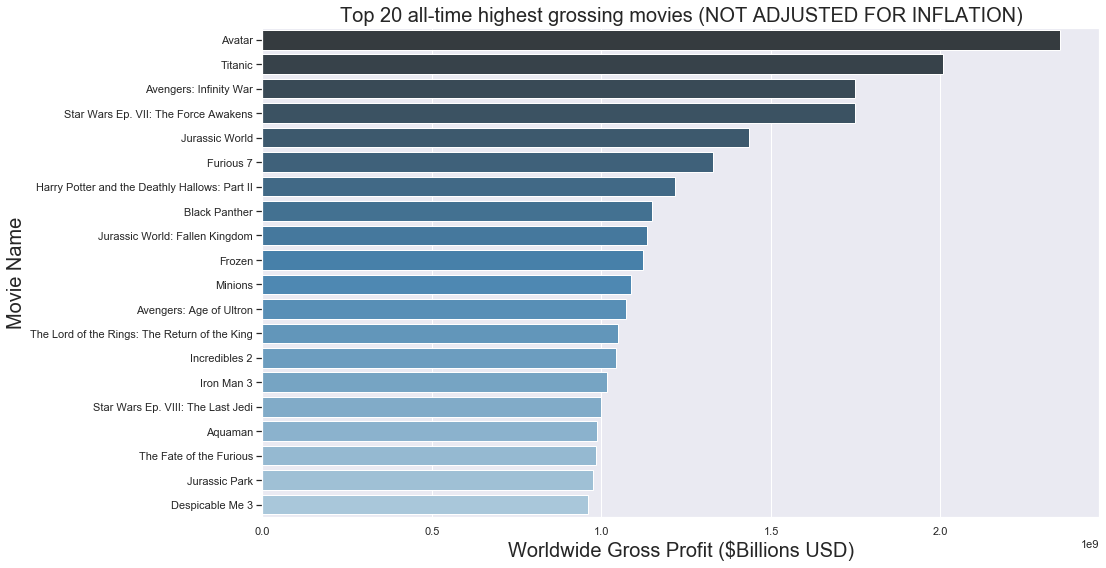

In [262]:
#ONLY TAKE TOP 20 MOVIES OF ALL TIME
top_20 = df_8.head(20)

sns.set(rc={'figure.figsize':(15,9)})
sns.set_style({'ytick.left': True})

ax = sns.barplot(x="gross_profit", y="movie", data=top_20, palette="Blues_d") 

ax.set_xlabel('Worldwide Gross Profit ($Billions USD)', fontsize=20)
ax.set_ylabel('Movie Name', fontsize=20)
ax.set_title('Top 20 all-time highest grossing movies (NOT ADJUSTED FOR INFLATION)', fontsize=20);


### Now let's filter to only display the movies from the last 10 years (2010-2020)

In [263]:
#CREATE 'release_year' TO FILTER ON YEAR
df_8[['month_day', 'release_year']] = df_8['release_date'].str.split(', ', expand=True)

df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month_day,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,Dec 18,2009
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,Dec 19,1997
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015
...,...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,Apr 27,2001
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,Jun 14,2019
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,Mar 11,2011
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,Dec 31,2020


In [264]:
#FILTER FOR THE LAST 10 YEARS
df_8 = df_8[df_8['release_year'] > '2010']

df_8

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month_day,release_year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Apr 3,2015
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,Jul 15,2011
...,...,...,...,...,...,...,...,...,...
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000,Dec 13,2017
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,Jun 14,2019
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,Mar 11,2011
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000,Dec 31,2020


In [265]:
#CALCULATE ROI AND MAKE A NEW COLUMN
df_8['gross_profit_percent'] = (df_8['gross_profit'] - df_8['production_budget'])/ df_8['production_budget'] * 100

df_8.head(20)

/Users/andrewhotchkiss/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profit,month_day,release_year,gross_profit_percent
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018,482.711400
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015,471.016739
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015,566.909239
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Apr 3,2015,599.327786
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,Jul 15,2011,873.354526
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,Feb 16,2018,474.129112
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,Jun 22,2018,568.101646
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,Nov 22,2013,648.313273
672,73,"Jul 10, 2015",Minions,74000000,336045770,1160336173,1086336173,Jul 10,2015,1368.021855
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,May 1,2015,224.384139


In [266]:
#RESET THE INDEX AFTER SORTING
df_8.reset_index(drop=True, inplace=True)

In [267]:
#NOW LET'S LOOK AT THE OTHER FINANCIAL TABLE AND SEE IF THERE'S ADDITIONAL DATA WE CAN USE
df_9.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [268]:
#WE ARE DEFINITELY INTERESTED IN THE STUDIO COLUMN FOR LATER, SO LET'S LOOK AT MERGING WITH df_8

#REMOVE DUPLICATES
df_9.drop_duplicates("title", keep=False, inplace=True)
df_9

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [269]:
#FIND NULL VALUES

df_9_null = df_9.columns[df_9.isnull().any()]
df_9[df_9_null].isnull().sum()

studio               5
domestic_gross      28
foreign_gross     1349
dtype: int64

In [270]:
#SORT BY LAST 10 YEARS
df_9 = df_9[df_9['year'] > 2010]

df_9

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,2011
330,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
331,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000,2011
332,Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [271]:
#RENAME THE COLUMNS IN df_9 TO MATCH df_8
df_9.rename(columns={'title': 'movie'}, inplace=True)

df_9

/Users/andrewhotchkiss/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,movie,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,2011
330,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
331,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000,2011
332,Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [272]:
#JOIN df_8 and df_9 ON 'title'...USING AN INNER JOIN TO LIMIT NULL VALUES AFTER JOIN #
df_finance = df_8.merge(df_9, how='left', on="movie")

display(df_finance.head(5), df_finance.shape)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,month_day,release_year,gross_profit_percent,studio,domestic_gross_y,foreign_gross,year
0,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Apr 27,2018,482.711400,BV,678800000.0,"1,369.5",2018.0
1,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,Dec 18,2015,471.016739,NaN,NaN,NaN,NaN
2,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,Jun 12,2015,566.909239,Uni.,652300000.0,"1,019.4",2015.0
3,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,Apr 3,2015,599.327786,Uni.,353000000.0,"1,163.0",2015.0
4,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,Jul 15,2011,873.354526,NaN,NaN,NaN,NaN


(1870, 14)

In [273]:
#DROP UNNECESSARY COLUMNS LEFT OVER FROM THE JOIN
df_finance.drop(['id', 'domestic_gross_y', 'year', 'month_day'], axis=1, inplace=True)

In [274]:
df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,BV,"1,369.5"
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,NaN
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Uni.,"1,019.4"
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Uni.,"1,163.0"
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,NaN


In [322]:
#CREATE THE 'foreign_gross' COLUMN USING df_8 DATA IN CASE WE NEED IT LATER
df_finance['foreign_gross'] = df_finance['worldwide_gross'] - df_finance['domestic_gross_x']


In [323]:
df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,Disney,1369318718,Avengers: Infinity War - 2018
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,1116648995,Star Wars Ep. VII: The Force Awakens - 2015
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Univ.,996584239,Jurassic World - 2015
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Univ.,1165715774,Furious 7 - 2015
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,960500000,Harry Potter and the Deathly Hallows: Part II ...


In [324]:
#ADD YEAR MOVIE RELEASED COLUMN TO WHOLE df_finance
df_finance["year_movie_released"] = df_finance['movie'] + "{}".format(" - ") + df_finance['release_year']

df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,Disney,1369318718,Avengers: Infinity War - 2018
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,1116648995,Star Wars Ep. VII: The Force Awakens - 2015
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Univ.,996584239,Jurassic World - 2015
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Univ.,1165715774,Furious 7 - 2015
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,960500000,Harry Potter and the Deathly Hallows: Part II ...


In [325]:
#SLICE THE TOP 20 FOR PERSPECTIVE
df_gp_20 = df_finance[:20]

df_gp_20.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,Disney,1369318718,Avengers: Infinity War - 2018
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,1116648995,Star Wars Ep. VII: The Force Awakens - 2015
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Univ.,996584239,Jurassic World - 2015
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Univ.,1165715774,Furious 7 - 2015
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,960500000,Harry Potter and the Deathly Hallows: Part II ...


## Macro Question #2: What are the most successful films of the past 10 years?

Answer: See plot below.

In [326]:
#GET THE PERCENTAGES TO DISPLAY ON TOP OF BAR PLOT...THANKS STACK OVERFLOW!

#BELOW CODE FROM: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

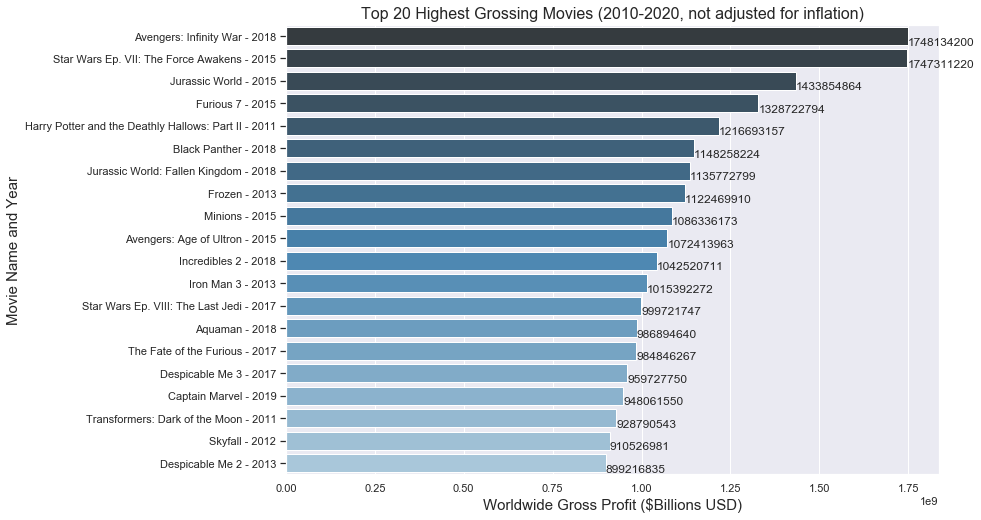

In [327]:
#GENERAL PLOT PROPERTIES
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style({'ytick.left': True})

#ACTUAL PLOT
ax = sns.barplot(x="gross_profit", y="year_movie_released", data=df_gp_20, palette="Blues_d") 

#SET LABELS
# ax.set(xlabel='Gross profit in $Billion USD', ylabel='Movie Name and Year'
# , title="Top 20 Highest Gross Profit Movies (2010-2020)")

ax.set_xlabel('Worldwide Gross Profit ($Billions USD)', fontsize=15)
ax.set_ylabel('Movie Name and Year', fontsize=15)
ax.set_title('Top 20 Highest Grossing Movies (2010-2020, not adjusted for inflation)', fontsize=16);

show_values_on_bars(ax, "h", 0.3)

## Macro Question #3: Did films make more money in the U.S. or in foreign markets?

Answer: Foreign markets. 

Domestic Average Gross: $44,153,822

Foreign Average Gross: $68,379,950


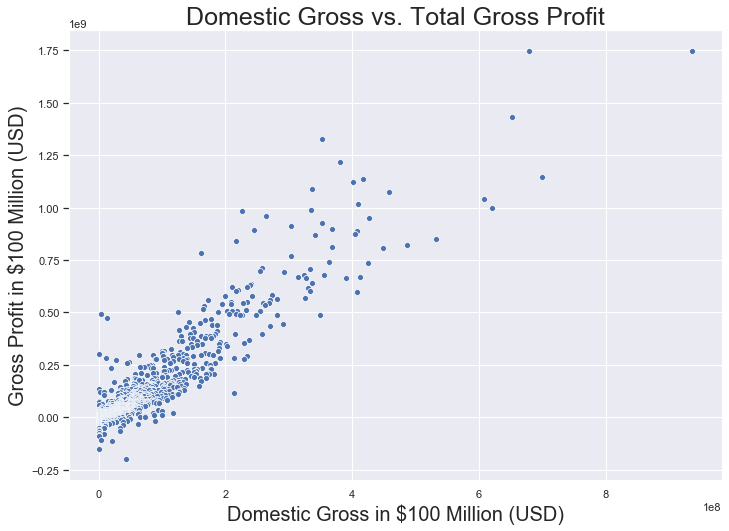

In [328]:
#LET'S SEE IF DOMESTIC GROSS CORRELATES TO GROSS PROFIT...I'D EXPECT YES
ax = sns.scatterplot(x='domestic_gross_x', y='gross_profit', data=df_finance)

ax.set_xlabel('Domestic Gross in $100 Million (USD)', fontsize=20)
ax.set_ylabel('Gross Profit in $100 Million (USD)', fontsize=20)
ax.set_title('Domestic Gross vs. Total Gross Profit', fontsize=25);

In [329]:
#SUMMARY STATISTICS ON THE ROI TOTAL COLUMN
df_finance['domestic_gross_x'].describe()

count    1.870000e+03
mean     4.415382e+07
std      8.006334e+07
min      0.000000e+00
25%      3.773200e+04
50%      1.280606e+07
75%      5.326285e+07
max      9.366622e+08
Name: domestic_gross_x, dtype: float64

In [330]:
df_finance['foreign_gross'].describe()

count    1.870000e+03
mean     6.837995e+07
std      1.442864e+08
min      0.000000e+00
25%      9.691750e+04
50%      1.026713e+07
75%      5.970208e+07
max      1.369319e+09
Name: foreign_gross, dtype: float64

In [345]:
foreign_m = df_finance['foreign_gross'].mean()
dom_m = df_finance['domestic_gross_x'].mean()

display(foreign_m, dom_m)

68379950.46951872

44153822.08074866

In [331]:
#ADD YEAR MOVIE RELEASED COLUMN TO WHOLE df_finance
df_finance["year_movie_released"] = df_finance['movie'] + "{}".format(" - ") + df_finance['release_year']

df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,Disney,1369318718,Avengers: Infinity War - 2018
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,1116648995,Star Wars Ep. VII: The Force Awakens - 2015
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Univ.,996584239,Jurassic World - 2015
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Univ.,1165715774,Furious 7 - 2015
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,960500000,Harry Potter and the Deathly Hallows: Part II ...


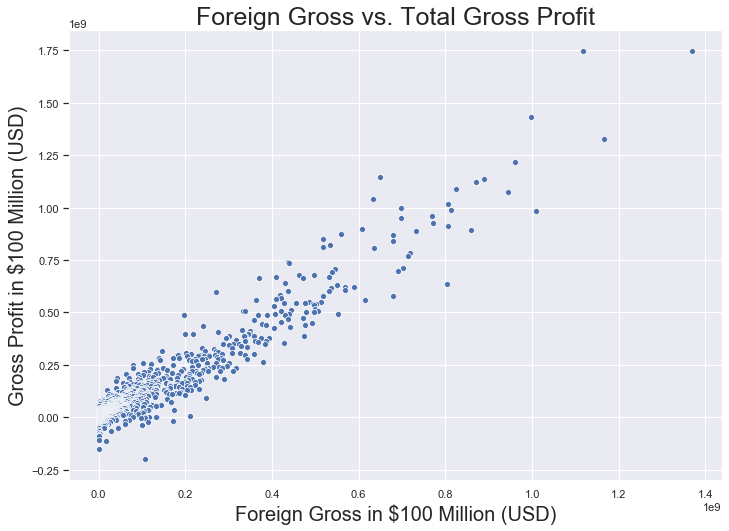

In [332]:
#FOREIGN GROSS?
ax = sns.scatterplot(x='foreign_gross', y='gross_profit', data=df_finance)

ax.set_xlabel('Foreign Gross in $100 Million (USD)', fontsize=20)
ax.set_ylabel('Gross Profit in $100 Million (USD)', fontsize=20)
ax.set_title('Foreign Gross vs. Total Gross Profit', fontsize=25);

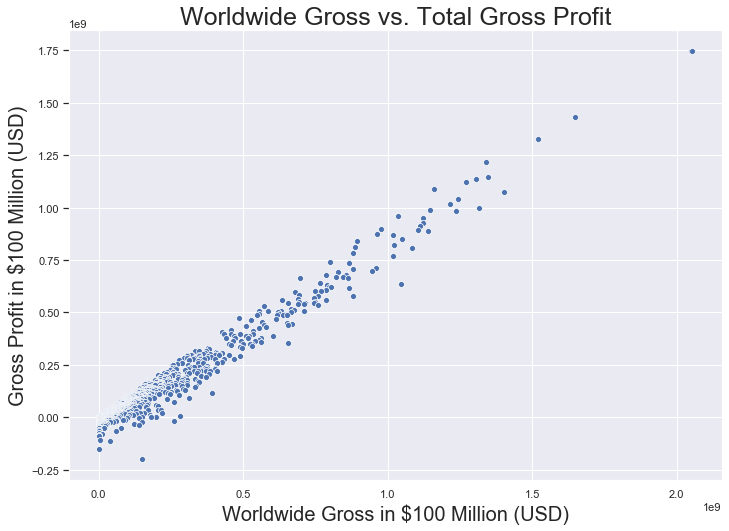

In [335]:
#WORLDWIDE GROSS?
ax = sns.scatterplot(x='worldwide_gross', y='gross_profit', data=df_finance)

ax.set_xlabel('Worldwide Gross in $100 Million (USD)', fontsize=20)
ax.set_ylabel('Gross Profit in $100 Million (USD)', fontsize=20)
ax.set_title('Worldwide Gross vs. Total Gross Profit', fontsize=25);

## Macro Question #4: What percentage of movies released in theaters are successful?

Answer: ~60%

To do this, we'll look at overall gross profits for the last 10 years, then break up the markets into total, domestic only, and foreign only.

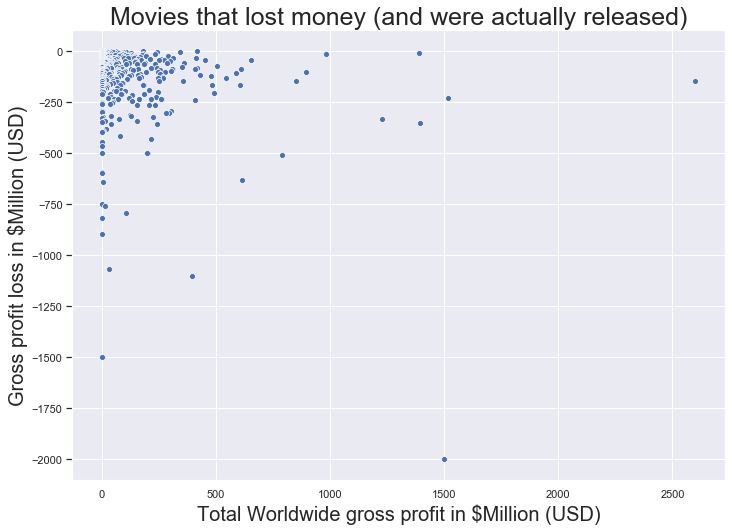

In [334]:
#PLOT ALL THE MOVIES THAT LOST MONEY BUT STILL HAD A NET POSITIVE WORLDWIDE GROSS (MEANING THEY WERE RELEASED)

x = df_finance['worldwide_gross'] * (.00001)
y = df_finance['gross_profit'][df_finance['gross_profit'] < 0] * (.00001)

ax = sns.scatterplot(x, y, data=df_finance)

ax.set_xlabel('Total Worldwide gross profit in $Million (USD)', fontsize=20)
ax.set_ylabel('Gross profit loss in $Million (USD)', fontsize=20)
ax.set_title('Movies that lost money (and were actually released)', fontsize=25);


In [287]:
#WHAT PERCENT OF ALL MOVIES IN LAST 10 YEARS LOST MONEY? 

#CAPTURE ONLY MOVIES THAT LOST MONEY
df_gross_neg = df_finance['gross_profit'].loc[df_finance['gross_profit'] < 0].count()

#CALCULATE PERCENT OF MOVIES THAT WHERE SHOWN IN THE US THAT LOST MONEY
d_loss_percent = np.round((df_gross_neg / (df_finance['movie'].count()) * 100), 2)

print("Total number of movies that lost money: {}, ".format(df_gross_neg), "Percent total that lost money: {}%".format(d_loss_percent))


Total number of movies that lost money: 753,  Percent total that lost money: 40.27%


In [288]:
#HOW MANY DOMESTIC MOVIES LOST MONEY THAT WERE ACTUALLY RELEASED
df_gross_dom_only = df_finance.loc[(df_finance['domestic_gross_x'] == df_finance['worldwide_gross'])
                                             & (df_finance['domestic_gross_x'] > 0)]

df_gross_neg_1 = df_finance.loc[df_finance['gross_profit'] < 0]

df_dom_loss = df_gross_dom_only.merge(df_gross_neg_1, on='movie', how='inner')

#DOUBLE-CHECK FOR DUPLICATES
df_dom_loss.drop_duplicates('movie', keep='last', inplace=True)

df_dom_loss.head()

,release_date_x,movie,production_budget_x,domestic_gross_x_x,worldwide_gross_x,gross_profit_x,release_year_x,gross_profit_percent_x,studio_x,foreign_gross_x,...,release_date_y,production_budget_y,domestic_gross_x_y,worldwide_gross_y,gross_profit_y,release_year_y,gross_profit_percent_y,studio_y,foreign_gross_y,year_movie_released_y
0,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012,-149.066667,NaN,4583,...,"Jan 13, 2012",9000,4584,4584,-4416,2012,-149.066667,NaN,4583,Newlyweds - 2012
1,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,-186.862963,NaN,3546,...,"Jan 27, 2017",27000,3547,3547,-23453,2017,-186.862963,NaN,3546,Emily - 2017
2,"Feb 11, 2011",Raymond Did It,40000,3632,3632,-36368,2011,-190.920000,NaN,3631,...,"Feb 11, 2011",40000,3632,3632,-36368,2011,-190.920000,NaN,3631,Raymond Did It - 2011
3,"Jul 25, 2014",Happy Christmas,70000,30312,30312,-39688,2014,-156.697143,NaN,30311,...,"Jul 25, 2014",70000,30312,30312,-39688,2014,-156.697143,NaN,30311,Happy Christmas - 2014
4,"Mar 21, 2014",Cheap Thrills,100000,59424,59424,-40576,2014,-140.576000,NaN,59423,...,"Mar 21, 2014",100000,59424,59424,-40576,2014,-140.576000,NaN,59423,Cheap Thrills - 2014


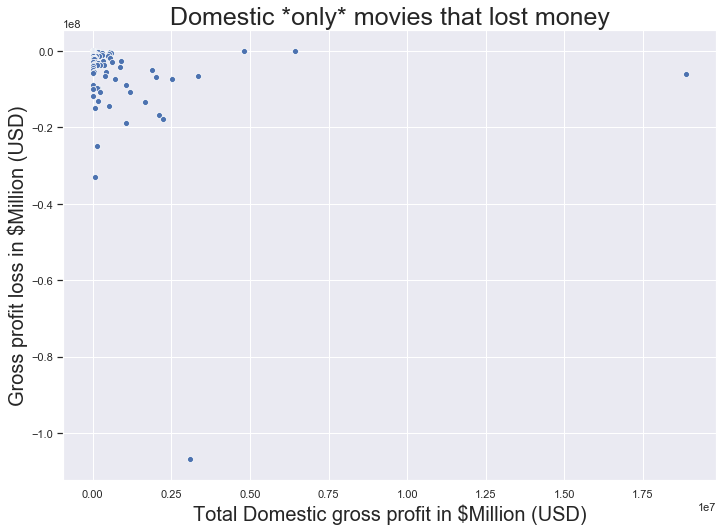

In [289]:
#PLOT THE ABOVE DATA

x = df_dom_loss['domestic_gross_x_x']

y = df_dom_loss['gross_profit_x']

ax = sns.scatterplot(x, y, data=df_dom_loss)

ax.set_xlabel('Total Domestic gross profit in $Million (USD)', fontsize=20)
ax.set_ylabel('Gross profit loss in $Million (USD)', fontsize=20)
ax.set_title('Domestic *only* movies that lost money', fontsize=25);

In [290]:
#CALCUALTE TOTAL DOMESTIC FILMS THAT LOST MONEY IN LAST 10 YEARS 
#CALCULATE THE PERCENT OF ALL DOMESTIC MOVIES THAT LOST MONEY 

#CAPTURE MOVIES THAT WERE ONLY SHOWN IN THE USA AND LOST MONEY

d_loss_d = np.round((df_dom_loss['movie'].count()) / (df_gross_dom_only['movie'].count()) * 100, 2)

d_loss_n = df_dom_loss['movie'].count()

print("Total movies only released domestically that lost money: {}, ".format(d_loss_n), "Percent of total: {}%".format(d_loss_d))


Total movies only released domestically that lost money: 112,  Percent of total: 84.21%


In [291]:
#CALCULATE HOW MANY FOREIGN MOVIES LOST MONEY

#CAPTURE FOREIGN MOVIES THAT WERE RELEASED, BUT ONLY ABROAD (OUTSIDE U.S.)
df_gross_for_only = df_finance.loc[(df_finance['domestic_gross_x'] == 0) & (df_finance['foreign_gross'] > 0)]

df_gross_neg_1 = df_finance.loc[df_finance['gross_profit'] < 0]

df_for_loss = df_gross_for_only.merge(df_gross_neg_1, on='movie', how='inner')

#DOUBLE-CHECK FOR DUPLICATES
df_for_loss.drop_duplicates('movie', keep='last', inplace=True)

df_for_loss.head()

,release_date_x,movie,production_budget_x,domestic_gross_x_x,worldwide_gross_x,gross_profit_x,release_year_x,gross_profit_percent_x,studio_x,foreign_gross_x,...,release_date_y,production_budget_y,domestic_gross_x_y,worldwide_gross_y,gross_profit_y,release_year_y,gross_profit_percent_y,studio_y,foreign_gross_y,year_movie_released_y
0,"Dec 31, 2011",Absentia,70000,0,8555,-61445,2011,-187.778571,NaN,8555,...,"Dec 31, 2011",70000,0,8555,-61445,2011,-187.778571,NaN,8555,Absentia - 2011
1,"Dec 31, 2013",Speak No Evil,150000,0,32927,-117073,2013,-178.048667,NaN,32927,...,"Dec 31, 2013",150000,0,32927,-117073,2013,-178.048667,NaN,32927,Speak No Evil - 2013
2,"Dec 31, 2015",Lumea e a mea,168000,0,29678,-138322,2015,-182.334524,NaN,29678,...,"Dec 31, 2015",168000,0,29678,-138322,2015,-182.334524,NaN,29678,Lumea e a mea - 2015
3,"Mar 24, 2015",Along the Roadside,250000,0,3234,-246766,2015,-198.706400,NaN,3234,...,"Mar 24, 2015",250000,0,3234,-246766,2015,-198.706400,NaN,3234,Along the Roadside - 2015
4,"Mar 31, 2015",Viskningar och rop,400000,0,9071,-390929,2015,-197.732250,NaN,9071,...,"Mar 31, 2015",400000,0,9071,-390929,2015,-197.732250,NaN,9071,Viskningar och rop - 2015


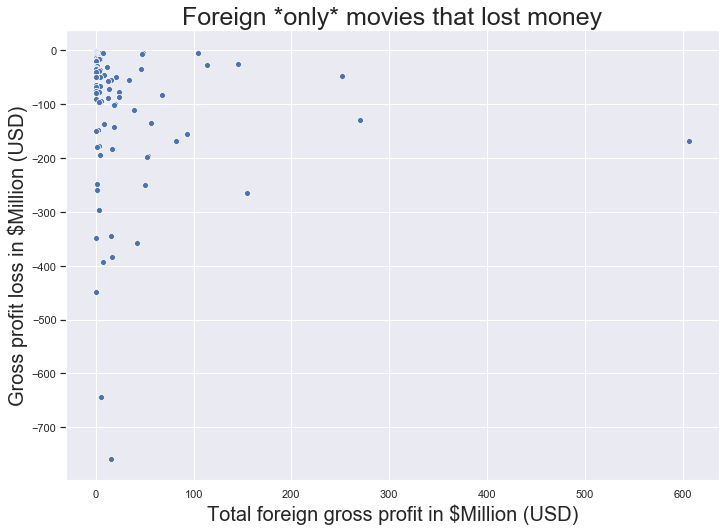

In [292]:
#PLOT THE ABOVE DATA

x = df_for_loss['foreign_gross_x'] * (.00001) 

y = df_for_loss['gross_profit_x'][df_for_loss['gross_profit_x'] < 0] * (.00001)

ax = sns.scatterplot(x, y, data=df_for_loss)

ax.set_xlabel('Total foreign gross profit in $Million (USD)', fontsize=20)
ax.set_ylabel('Gross profit loss in $Million (USD)', fontsize=20)
ax.set_title('Foreign *only* movies that lost money', fontsize=25);

In [293]:
#CALCUALTE TOTAL FOREIGN ONLY FILMS THAT LOST MONEY IN LAST 10 YEARS 
#CALCULATE THE PERCENT OF ALL FOREIGN MOVIES THAT LOST MONEY 

#CAPTURE MOVIES THAT WERE ONLY OVERSEAS AND LOST MONEY

f_loss_percent = np.round((df_for_loss['movie'].count()) / (df_gross_for_only['movie'].count()) * 100, 2)

f_loss_n = df_for_loss['movie'].count()

print("Total 'foreign only' movies that lost money: {}, ".format(f_loss_n), 
      "Percent total of 'foreign only' that lost money: {}%".format(f_loss_percent))


Total 'foreign only' movies that lost money: 96,  Percent total of 'foreign only' that lost money: 78.05%


## Macro Question #5: What's the average Return on Investment for a successful movie (2010-2020)?

Answer: 

Mean: 130%

Median: -40%

Standard Deviation: 1118%

The huge discrepancy between the median and the mean indicates that there are few hugely successful movies raising the mean.


In [294]:
df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,BV,2048134199,Avengers: Infinity War - 2018
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,2053311219,Star Wars Ep. VII: The Force Awakens - 2015
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Uni.,1648854863,Jurassic World - 2015
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Uni.,1518722793,Furious 7 - 2015
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,1341693156,Harry Potter and the Deathly Hallows: Part II ...


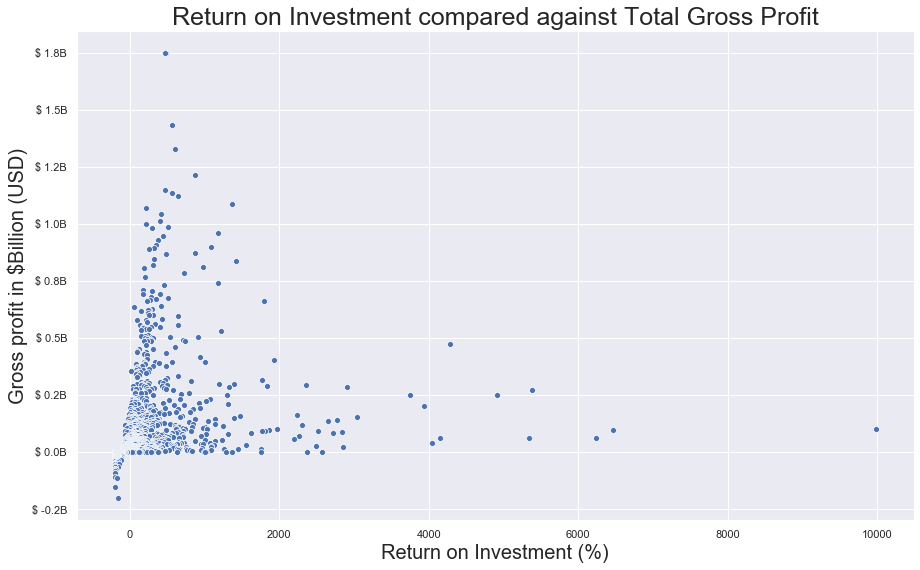

In [346]:
#EXPLORE CORRELATION BETWEEN ROI AND TOTAL GROSS PROFIT
from matplotlib.ticker import FuncFormatter

#BELOW CODE FROM: https://matplotlib.org/3.2.1/gallery/ticks_and_spines/custom_ticker1.html
def billions(x, pos):
    'The two args are the value and tick position'
    return '$ %1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

sns.set(rc={'figure.figsize':(15,9)})


x = df_finance['gross_profit_percent'][(df_finance['gross_profit_percent'] < 10000)]

y = df_finance['gross_profit'][(df_finance['gross_profit'] > 0) & df_finance['gross_profit'] < 30000000]

ax = sns.scatterplot(x, y, data=df_finance)

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Return on Investment (%)', fontsize=20)
ax.set_ylabel('Gross profit in $Billion (USD)', fontsize=20)
ax.set_title('Return on Investment compared against Total Gross Profit', fontsize=25);

In [296]:
#LET'S LOOK AT THE CORRELATION BETWEEN GROSS PROFIT AND RETURN ON INVESTMENT...I.E., DOES IT TAKE MONEY TO MAME
#MONEY?

df_finance['gross_profit'].corr(df_finance['gross_profit_percent'])

#ONLY A VERY SLIGHT POSITIVE CORRELATION...

0.14209990507252498

In [297]:
#STATS ON GROSS-PROFIT % AKA RETURN ON INVESTMENT

df_finance['gross_profit_percent'].describe()

count     1870.000000
mean       129.691909
std       1118.378304
min       -200.000000
25%       -181.434207
50%        -40.287259
75%        165.990676
max      41456.474000
Name: gross_profit_percent, dtype: float64

In [344]:
#ACTUAL GROSS PROFIT STATS
df_finance['gross_profit'].mean()

76356937.6593583

In [298]:
#LOOK FOR NULLS
null_columns=df_finance.columns[df_finance.isnull().any()]
df_finance[null_columns].isnull().sum()

studio    828
dtype: int64

# Phase 2: Micro-level questions


## Micro Question #1: Which movies had the most return on investment in the last 10 years?

Answer: See plot below.

In [299]:
#NOW LETS SORT OUT DATA TO FIND OUT WHICH MOVIES MADE THE MOST ON TOTAL, WORLDWIDE GROSS PROFIT AS A PERCENTAGE!
#IN OTHER WORDS, WHO MADE THE MOST AMOUNT OF MONEY COMPARED TO WHAT THEY SPENT TO MAKE THE MOVIE!

df_finance.sort_values('gross_profit_percent', ascending=False, inplace=True)

In [300]:
#LET'S JUST LOOK AT THE TOP 20

df_fin_20 = df_finance[:20]

df_fin_20.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
623,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41456.474000,WB (NL),41656473,The Gallows - 2015
386,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,2012,9975.949000,Par.,101759489,The Devil Inside - 2012
392,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,2011,6458.059067,FD,99870885,Insidious - 2011
505,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,2015,6236.419800,Uni.,64364197,Unfriended - 2015
162,"Jan 20, 2017",Split,5000000,138141585,278964806,273964806,2017,5379.296120,Uni.,278964805,Split - 2017


In [301]:
#RESET THE INDEX AFTER sort_values...

df_fin_20.reset_index(drop=True, inplace=True) #reset the index

In [302]:
df_fin_20.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41456.474000,WB (NL),41656473,The Gallows - 2015
1,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,2012,9975.949000,Par.,101759489,The Devil Inside - 2012
2,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,2011,6458.059067,FD,99870885,Insidious - 2011
3,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,2015,6236.419800,Uni.,64364197,Unfriended - 2015
4,"Jan 20, 2017",Split,5000000,138141585,278964806,273964806,2017,5379.296120,Uni.,278964805,Split - 2017


In [303]:
#NOW LET'S LOOK AT CONCATENATING TWO COLUMNS FOR OUR PLOT, SO THEY CAN BE DISPLAYED TOGETHER
#NEED TO FIRST CONFIRM THAT BOTH .dtypes ARE STRINGS

print(df_fin_20['release_year'].dtype)
print(df_fin_20['movie'].dtype)

object
object


In [304]:
#CONCATENATE 'movie' AND 'release_year' COLUMNS INTO NEW COLUMN 'year_movie_released'

df_fin_20["year_movie_released"] = df_fin_20['movie'] + "{}".format(" - ") + df_fin_20['release_year']

/Users/andrewhotchkiss/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [305]:
df_fin_20.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,2015,41456.474000,WB (NL),41656473,The Gallows - 2015
1,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,100759490,2012,9975.949000,Par.,101759489,The Devil Inside - 2012
2,"Apr 1, 2011",Insidious,1500000,54009150,99870886,98370886,2011,6458.059067,FD,99870885,Insidious - 2011
3,"Apr 17, 2015",Unfriended,1000000,32789645,64364198,63364198,2015,6236.419800,Uni.,64364197,Unfriended - 2015
4,"Jan 20, 2017",Split,5000000,138141585,278964806,273964806,2017,5379.296120,Uni.,278964805,Split - 2017


In [306]:
#GET THE PERCENTAGES TO DISPLAY ON TOP OF BAR PLOT...THANKS STACK OVERFLOW!

#BELOW CODE FROM: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

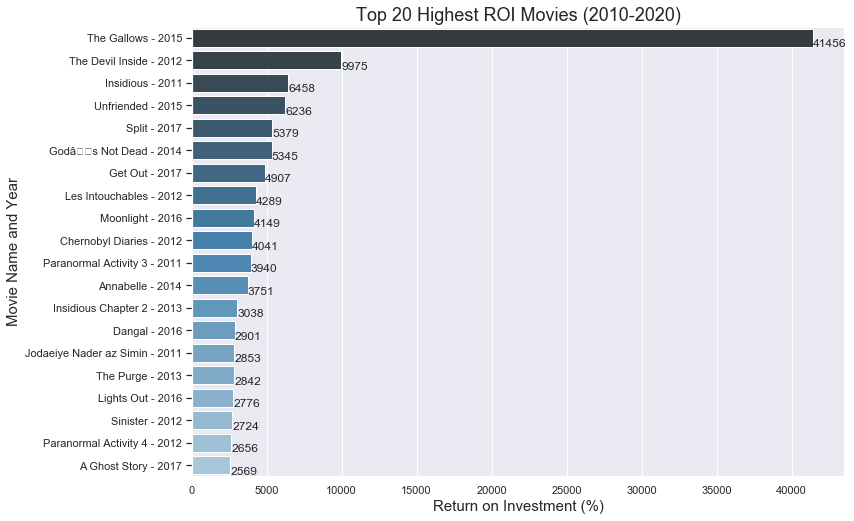

In [308]:
#GENERAL PLOT PROPERTIES
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style({'ytick.left': True})

#ACTUAL PLOT
ax = sns.barplot(x="gross_profit_percent", y="year_movie_released", data=df_fin_20, palette="Blues_d") 

#SET LABELS

ax.set_xlabel('Return on Investment (%)', fontsize=15)
ax.set_ylabel('Movie Name and Year', fontsize=15)
ax.set_title('Top 20 Highest ROI Movies (2010-2020)', fontsize=18);


show_values_on_bars(ax, "h", 0.3)

In [309]:
df_finance.sort_values('gross_profit', ascending=False, inplace=True)

df_finance.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio,foreign_gross,year_movie_released
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,BV,2048134199,Avengers: Infinity War - 2018
1,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,471.016739,NaN,2053311219,Star Wars Ep. VII: The Force Awakens - 2015
2,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Uni.,1648854863,Jurassic World - 2015
3,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Uni.,1518722793,Furious 7 - 2015
4,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,873.354526,NaN,1341693156,Harry Potter and the Deathly Hallows: Part II ...


## Micro Question #2: Which production companies were the most successful during the past 10 years?

In [348]:
#LET'S LOOK AT df_9 AGAIN...IT CONTAINS THE PRODUCTION COMPANY INFORMATION WE WANT.
df_9.head()

,movie,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,2011
330,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
331,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000,2011
332,Mission: Impossible - Ghost Protocol,Par.,209400000.0,485300000,2011


In [311]:
#RE-LABEL THE PRODUCTION COMPANY NAMES SO THEY'RE MORE READIBLE
df_finance['studio'] = df_finance['studio'].replace('BV', 'Disney')
df_finance['studio'] = df_finance['studio'].replace('Uni.', 'Univ.')
df_finance['studio'] = df_finance['studio'].replace('WB', 'W. Bros.')
df_finance['studio'] = df_finance['studio'].replace('P/DW', 'DreamWorks')
df_finance['studio'] = df_finance['studio'].replace('Par.', 'Paramount')
df_finance['studio'] = df_finance['studio'].replace('UTV', 'UTV(India)')
df_finance['studio'] = df_finance['studio'].replace('LGF', 'LionsGate')
df_finance['studio'] = df_finance['studio'].replace('LG/S', 'LG/Sony')


In [312]:
#JOIN df_9 WITH THE df_finance TABLE WE USED BEFORE.
df_test_2 = df_finance.merge(df_9, on='movie', how='inner')

df_test_2.head()

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio_x,foreign_gross_x,year_movie_released,studio_y,domestic_gross,foreign_gross_y,year
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,Disney,2048134199,Avengers: Infinity War - 2018,BV,678800000.0,"1,369.5",2018
1,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Univ.,1648854863,Jurassic World - 2015,Uni.,652300000.0,"1,019.4",2015
2,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Univ.,1518722793,Furious 7 - 2015,Uni.,353000000.0,"1,163.0",2015
3,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,474.129112,Disney,1348258223,Black Panther - 2018,BV,700100000.0,646900000,2018
4,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018,568.101646,Univ.,1305772798,Jurassic World: Fallen Kingdom - 2018,Uni.,417700000.0,891800000,2018


In [313]:
#CHECK NULL VALUES
df_test_2.isnull().sum()

release_date              0
movie                     0
production_budget         0
domestic_gross_x          0
worldwide_gross           0
gross_profit              0
release_year              0
gross_profit_percent      0
studio_x                  1
foreign_gross_x           0
year_movie_released       0
studio_y                  1
domestic_gross            1
foreign_gross_y         152
year                      0
dtype: int64

In [314]:
from matplotlib.ticker import FuncFormatter

#BELOW CODE FROM: https://matplotlib.org/3.2.1/gallery/ticks_and_spines/custom_ticker1.html
def billions(x, pos):
    'The two args are the value and tick position'
    return '$ %1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)


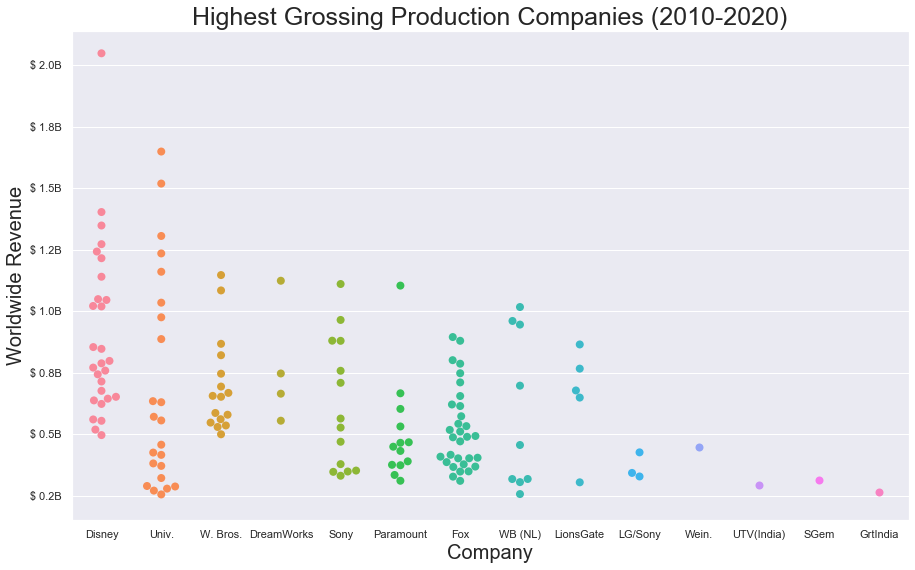

In [350]:
studio_20 = df_test_2['studio_x'][:150] 

sns.set(rc={'figure.figsize':(15,9)})

ax = sns.swarmplot(x=studio_20, y='worldwide_gross', data=df_test_2, size=8)

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Company', fontsize=20)
ax.set_ylabel('Worldwide Revenue', fontsize=20)
ax.set_title("Highest Grossing Production Companies (2010-2020)", fontsize=25);

## Micro Question #3: Which production company had the highest ROI? 

Answer: Disney.

In [353]:
#FIGURE OUT MEAN FOR DISNEY, UNIVERSAL, WARNERBROS, DREAMWORKS

disney = df_test_2['gross_profit'].loc[df_test_2['studio_x'] == 'Disney'].mean()

disney

345602972.0769231

In [318]:
universal= df_test_2['worldwide_gross'].loc[df_test_2['studio_x'] == 'Univ'].describe()
warner_bros = df_test_2['worldwide_gross'].loc[df_test_2['studio_x'] == 'W. Bros.'].describe()
dream_works = df_test_2['worldwide_gross'].loc[df_test_2['studio_x'] == 'DreamWorks'].describe()
sony = df_test_2['worldwide_gross'].loc[df_test_2['studio_x'] == 'Sony'].describe()

sony

count    6.500000e+01
mean     2.396823e+08
std      2.410571e+08
min      1.296701e+07
25%      1.050021e+08
50%      1.589053e+08
75%      2.514997e+08
max      1.110527e+09
Name: worldwide_gross, dtype: float64

## Micro Question #4: What parental guidance ratings were associated with the highest earnings?

Answer: PG (see plot below)

In [376]:
df_7.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [377]:
df_test_3 = df_test_2.merge(df_7, left_on='release_date', right_on='theater_date', how='left')

df_test_3

,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profit,release_year,gross_profit_percent,studio_x,foreign_gross_x,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,482.711400,Disney,2048134199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,566.909239,Univ.,1648854863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015,599.327786,Univ.,1518722793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018,474.129112,Disney,1348258223,...,PG,Animation|Comedy|Kids and Family,Nick Park,Mark Burton|James Higginson,"Feb 16, 2018","May 22, 2018",NaN,NaN,89 minutes,Lionsgate
4,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018,568.101646,Univ.,1305772798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,"Nov 1, 2013",Mr. Nobody,46500000,3622,22254,-46477746,2013,-199.952142,Magn.,22253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,"Jan 16, 2015",Blackhat,70000000,8005980,19665004,-50334996,2015,-171.907137,Univ.,19665003,...,PG-13,Drama,Richard Glatzer|Wash Westmoreland,Wash Westmoreland|Richard Glatzer,"Jan 16, 2015","May 12, 2015",NaN,NaN,99 minutes,Sony Pictures Classics
1108,"Jul 19, 2013",R.I.P.D.,130000000,33618855,79076678,-50923322,2013,-139.171786,Univ.,79076677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,"Jan 13, 2017",Monster Trucks,125000000,33370166,61642798,-63357202,2017,-150.685762,Paramount,61642797,...,NR,Drama,NaN,Leon Butler,"Jan 13, 2017","Mar 7, 2017",NaN,NaN,93 minutes,NaN


In [358]:
df_test_3['rating'].unique()

array([nan, 'PG', 'NR', 'PG-13', 'R'], dtype=object)

In [368]:
#BELOW CODE FROM: https://matplotlib.org/3.2.1/gallery/ticks_and_spines/custom_ticker1.html
def billions(x, pos):
    'The two args are the value and tick position'
    return '$ %1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

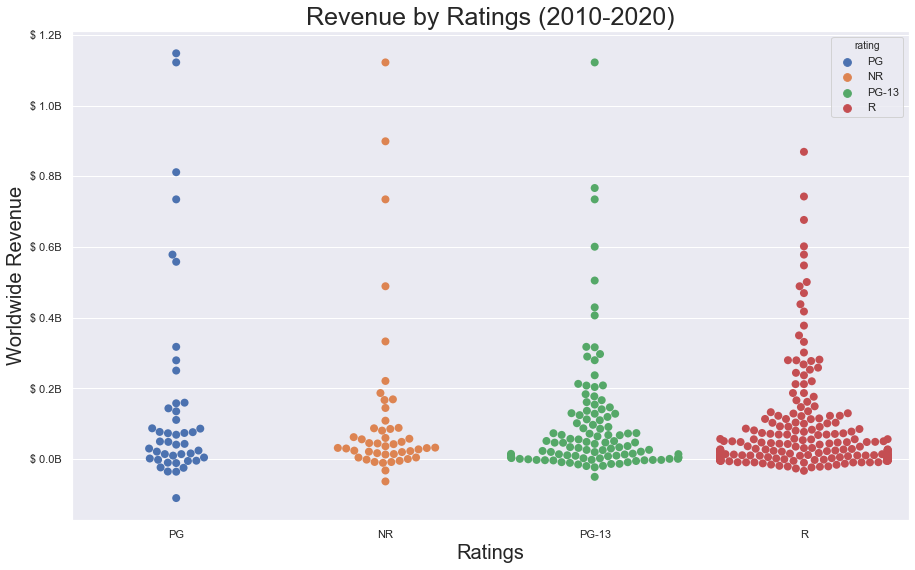

In [375]:
#PLOT PARENTAL GUIDANCE RATINGS RELATED TO EARNINGS
sns.set(rc={'figure.figsize':(15,9)})

ax = sns.swarmplot(x='rating', y='gross_profit', hue='rating', data=df_test_3, size=8)

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Ratings', fontsize=20)
ax.set_ylabel('Worldwide Revenue', fontsize=20)
ax.set_title("Revenue by Ratings (2010-2020)", fontsize=25);

In [379]:
df_test_3['worldwide_gross'].loc[df_test_3['rating'] == 'PG'].mean()

220669960.45454547

In [380]:
df_test_3['worldwide_gross'].loc[df_test_3['rating'] == 'PG-13'].mean()

152179763.15238094

In [381]:
df_test_3['worldwide_gross'].loc[df_test_3['rating'] == 'R'].mean()

127347248.85858586

In [382]:
df_test_3['worldwide_gross'].loc[df_test_3['rating'] == 'NR'].mean()

169538515.54347825

# MOD 1 Project Cut line...everything below here is notes

In [ ]:
pip install tmdbsimple

In [ ]:
import requests

In [ ]:
import tmdbsimple as tmdb
import json


In [ ]:
with open("/Users/andrewhotchkiss/.secret/tmdb_api.json") as f:
    api_info = json.load(f)

tmdb.API_KEY = api_info['api_key']

In [ ]:
#API USE
#1. GET THE ID
#2. PLUG ID INTO 'MOVIES' CLASS USING FOR LOOP
#3. PUT DIRECTORS/PRODUCTION COMPANIES INTO DATAFRAME
#4. PLOT AWAY!

In [ ]:
movie = tmdb.Movies(603)
response = movie.info()
display(movie.title, movie.production_companies[0])#USE INDEX VALUE BY REFERENCING THE API DOCUMENTATION


In [ ]:
type(movie.title)

In [ ]:
response = movie.releases()
for c in movie.countries:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

In [ ]:
list_1 = []


search = tmdb.Search()
response = search.movie(query=list_1)

for s in search.results:
    print(s['title'], s['id'])
                                                        

In [ ]:
response = movie.releases()
for c in movie.production_companies:
    print(c['name'], c['id'])

In [ ]:


search = tmdb.Search()
tmdb_ids = []
errors = []
items = 0
for movie in movie_unique:
    items += 1
    print(items)
    yr = (movie[0:4])
    name = (movie[5:])
    try:
        response = search.movie(query = name,year=yr)
        tmdb_ids.append(search.results[0]['id'])
    except: 
        tmdb_ids.append('Missing')
        errors.append(movie)
    if items == len(movie_unique):
        break

In [ ]:
movie_titles = df_finance['movie'][:200]

tmdb_ids = []
errors = []
items = 0

for movie in movie_titles:
    items += 1
    print(items)
    name = movie[1]
    try:
        response = search.movie(query= name)
        tmdb_ids.append(search.results[0]['id'])
    except:
        tmdb_ids.append('Missing')
        errors.append(movie)
    if items == len(movie_titles):
        break
    

In [ ]:
df_finance['movie'][:20]

In [ ]:
#just find directors and studios, then add that to current dataframe. 

#steps:
#1. JOIN df_1 to df_8 TO GET THE TMBD COMPATIBLE IDs ADDED TO THE NEW TABLE
    #JOIN DIRECTOR'S TABLE 
#2. FILTER RESULTS TO THE TOP 20 HIGHEST GROSS PROFIT MARGIN MOVIES OF ALL TIME
#3. FILL IN THE NAN VALUES FROM THE TMDB API
    #
#4. PLOT THE DIRECTORS AND THEIR REVENUE
#5. PLOT THE GENRES AND THEIR REVENUE


#drop NAN
#CONVERT to INT
#then you can pass the series into a loop (because it's an iterable!!)

#for movie_id in df_id_y: 
    #movie = tmdb.Movies(284054)
